This code attempts to apply XGBoosting to the nutrition dataset to predict the carbon intensity of food products. 
First attempt with no tuning saw a significant decrease in absolute error of 0.233, for std of 1.61. 
Next step was to apply the whole data set, including Nulls to try and take advantage of SGBoosts characteristic of being able to predict for missing data values. This improved the absolute error by 0.06, however every time the model runs it gets a slightly different error, due to training on a slightly different set. 
So far I have used SGBoost by setting the objective to be reg:squared error, Specify the learning task and the corresponding learning objective to be regression with squared loss. 
Squaredlogerror, uses regression with squared log loss, this sees a mean absolute error of 0.2534 for a sd of y_pred of 1.7. Using this squared log error uses more trees to converge. 
pseudohubererror has an error absolute mean of 0.408, largest so far, probably as it is regression with Pseudo Huber loss, a twice differentiable alternative to absolute loss. Converges to this error around the same as previous iterations, at 20 trees. 


In [65]:
#importing modules for the implementation
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import xgboost as xgb
from xgboost import XGBRegressor


In [101]:
nutrition = pd.read_csv("./Nutrition_Full_Features.csv")

In [102]:
#dropping NANSinclude a lot of NaNs
#nutrition.drop(nutrition.columns[1:3], axis=1, inplace=True)

In [105]:
#extracting the nutrition data, labelling X, for null data set 
#X = nutrition.iloc[:,16:]
#extracting the greenhouse gas emissions 
y = nutrition.iloc[:,9:10]
y
y = np.ravel(y)

In [106]:
#extracting the nutrition data, labelling X as this is the input to the SKlearn algorithm
X = nutrition.iloc[:,11:]
#extracting the greenhouse gas emissions 
y = nutrition.iloc[:,7:8]
y = np.ravel(y)
print(np.mean(y))

0.8646597710547834


In [107]:
#splitting the dataset into a test and train data set, with 20% being used for testing
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.2) #size =0.2 means 80% data is training data, 20% testing


In [108]:
#splitting train data set into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.01)

In [118]:
model = XGBRegressor(n_estimators=50)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
#evaluating the model by checking errors
#generally error decreases slightly as number of trees is increased, converges around 200 trees

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2703532392213296
Mean Squared Error: 0.6191349649378819
Root Mean Squared Error: 0.7868512978561336


In [120]:
#writing a for loop to pull out the error at varying n_estimators (otherwise known as the number of trees the algorithm is using)


mse = []
mae = []
rmse = []
        
for i in range(10,1000,1):
    model = XGBRegressor(n_estimators=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Mean_Absolute_Error = metrics.mean_absolute_error(y_test, y_pred)
    Mean_Squared_Error = metrics.mean_squared_error(y_test, y_pred)
    Root_Mean_Squared_Error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
   
    mse.append(Mean_Squared_Error)
    rmse.append(Root_Mean_Squared_Error)
    mae.append(Mean_Absolute_Error)

<function matplotlib.pyplot.show(close=None, block=None)>

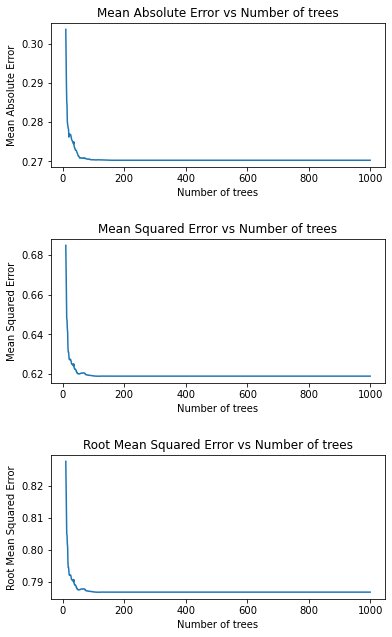

In [121]:
#creating a list of the number of estimators for ploting 
Number_estimators = list(range(10,1000,1))


fig = plt.figure()
Absolute = plt.subplot(311)
Absolute.title.set_text('Mean Absolute Error vs Number of trees')
plt.plot(Number_estimators,mae)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of trees')
plt.show

Square = plt.subplot(312)
Square.title.set_text('Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,mse)
plt.ylabel('Mean Squared Error')
plt.xlabel('Number of trees')
plt.show

Root = plt.subplot(313)
Root.title.set_text('Root Mean Squared Error vs Number of trees')
plt.plot(Number_estimators,rmse)
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Number of trees')
plt.subplots_adjust(top= 4, bottom=2, wspace=1, hspace=0.5)
plt.savefig('Error Plots')
plt.show


